# Calssification

We are going to cover supervised learning technique "Classification" in depth. We will look into different models used for classification.

## Naive Bayes Classification

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.
Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.
This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

## Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

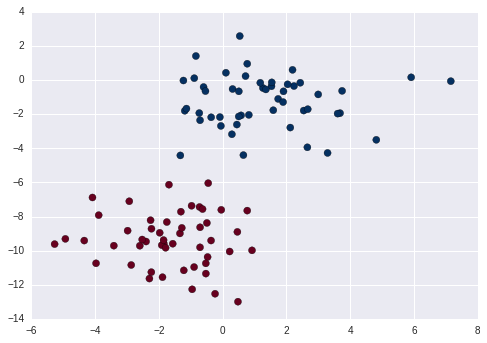

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. The result of this naive Gaussian assumption is shown in the following figure:



![(run code in Appendix to generate image)](figures/05.05-gaussian-NB.png)



The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood  P(features | L1)P(features | L1)  for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.


This procedure is implemented in Scikit-Learn's sklearn.naive_bayes.GaussianNB estimator:

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [4]:
# Now let's generate some new data and predict the label:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

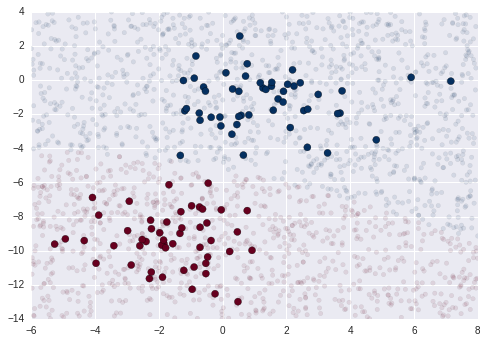

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.


A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in Feature Engineering; here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [7]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [10]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
target = ['talk.religion.misc', 'alt.atheism', 'sci.space']

train = fetch_20newsgroups(subset='train', categories=target)
test = fetch_20newsgroups(subset='test', categories=target)

In [17]:
print train.data[1]

From: porta@wam.umd.edu (David Palmer)
Subject: Re: 14 Apr 93   God's Promise in 1 John 1: 7
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 23

In article <1qknu0INNbhv@shelley.u.washington.edu> sieferme@stein.u.washington.edu (Eric Sieferman) writes:
>In article <f1VMPxk@quack.kfu.com> pharvey@quack.kfu.com (Paul Harvey) writes:
>>In article <bskendigC5H4o3.D5p@netcom.com> 
>>
>>Human blood sacrifice! Martyrdom of an innocent virgin! "Nailed" to a
>>wooden pole! What is this obsession with male menstruation?
>
>Christian:  washed in the blood of the lamb.
>Mithraist:  washed in the blood of the bull.
>
>If anyone in .netland is in the process of devising a new religion,
>do not use the lamb or the bull, because they have already been
>reserved.  Please choose another animal, preferably one not
>on the Endangered Species List.  
>
>

How about Cockroaches?
-- 
***************************** porta@wam.umd.edu ****************************
	Wh

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [19]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

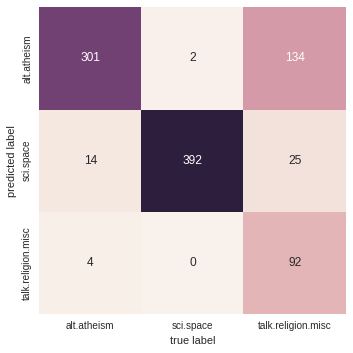

In [28]:
# Lets see the confusion matrix:

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test.target, labels)
sns.heatmap(matrix.T, square=True, cbar=False, fmt='d',
            annot=True, xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion!


The very cool thing here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline. Here's a quick utility function that will return the prediction for a single string:

In [29]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [30]:
predict_category('sending a payload to the ISS')

'sci.space'

In [31]:
predict_category('determining the screen resolution')

'sci.space'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

## Logistic Regression

Logistic regression fits a logistic model to data and makes predictions about the probability of an event (between 0 and 1).

This recipe shows the fitting of a logistic regression model to the iris dataset. Because this is a mutli-class classification problem and logistic regression makes predictions between 0 and 1, a one-vs-all scheme is used (one model per class).

In [33]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

dataset = load_iris()
model = LogisticRegression()

## split and fit data

## k-Nearest Neighbor

The k-Nearest Neighbor (kNN) method makes predictions by locating similar cases to a given data instance (using a similarity function) and returning the average or majority of the most similar data instances. The kNN algorithm can be used for classification or regression.

This recipe shows use of the kNN model to make predictions for the iris dataset.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# split and fit data

## Classification and Regression Trees

Classification and Regression Trees (CART) are constructed from a dataset by making splits that best separate the data for the classes or predictions being made. The CART algorithm can be used for classification or regression.

This recipe shows use of the CART model to make predictions for the iris dataset.

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# summarize the fit of the model
# print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected, predicted))